In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Data Preparation

In [2]:
# load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
# Missing values check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Menampilkan statistik deskriptif dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Cek ukuran data awal dan jumlah missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Daftar fitur numerik
numerical_cols = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time'
]

# Loop IQR filtering
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # filter rows
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Ukuran data setelah menghapus outlier:", df.shape)
df.head()


Ukuran data setelah menghapus outlier: (224, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


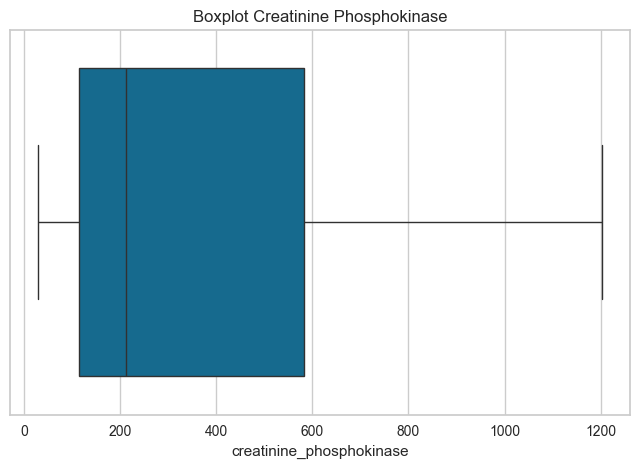

In [7]:
# Cek Outlier dengan Boxplot creatinine_phosphokinase
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['creatinine_phosphokinase'])
plt.title('Boxplot Creatinine Phosphokinase')
plt.show()

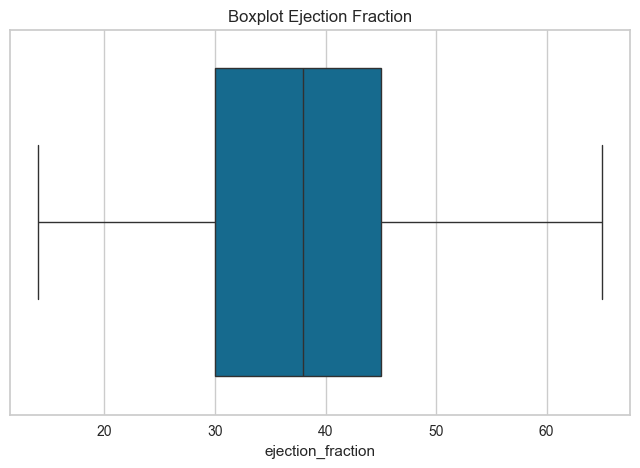

In [8]:
# Cek Outlier dengan Boxplot ejection_fraction
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ejection_fraction'])
plt.title('Boxplot Ejection Fraction')
plt.show()

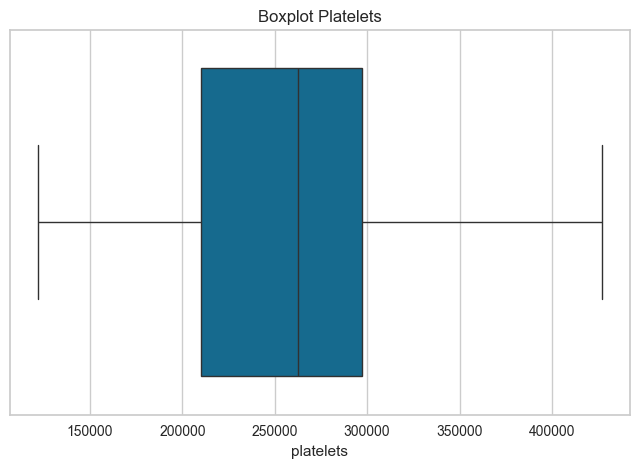

In [9]:
# Cek Outlier dengan Boxplot platelets
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['platelets'])
plt.title('Boxplot Platelets')
plt.show()

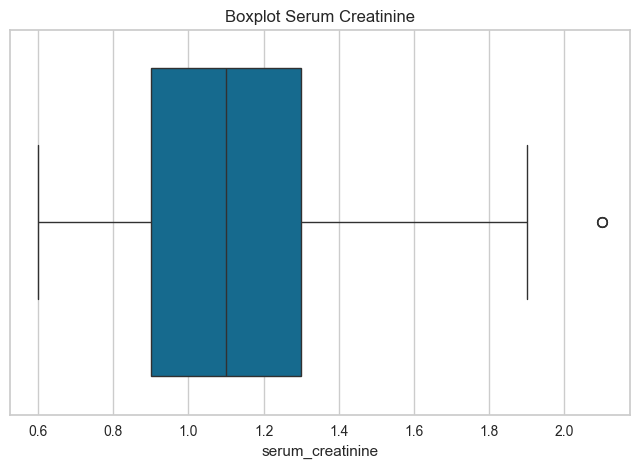

In [10]:
# Cek Outlier dengan Boxplot serum_creatinine
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['serum_creatinine'])
plt.title('Boxplot Serum Creatinine')
plt.show()

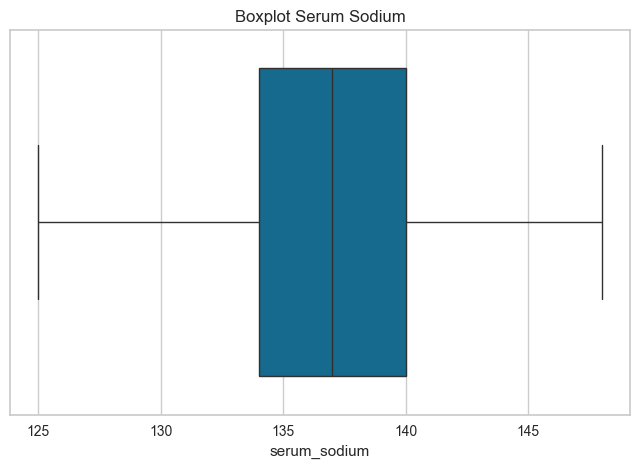

In [11]:
# Cek Outlier dengan Boxplot serum_sodium
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['serum_sodium'])
plt.title('Boxplot Serum Sodium')
plt.show()

In [12]:
# Transformasi fitur kategorikal menggunakan Label Encoding
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [13]:
# Normalisasi 
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190537,0,0.878670,0,-1.555768,1,0.136333,2.358663,-1.854716,1,0,-1.683733,1
2,0.351568,0,-0.684634,0,-1.555768,0,-1.400896,0.524147,-2.117996,1,1,-1.644471,1
3,-0.906886,1,-0.810128,0,-1.555768,0,-0.684517,2.358663,-0.011754,1,0,-1.644471,1
5,2.448991,1,-1.039604,0,0.155882,1,-0.774065,2.970169,-1.328155,1,1,-1.631383,1
6,1.190537,1,-0.326078,0,-1.983680,0,-1.923255,0.218395,-0.011754,1,0,-1.605208,1


# Modelling

### Perbandingan Model Decision Tree Classifier dan Random Forest Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [15]:
# Proses Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"Data train: {X_train.shape}")
print(f"Data test: {X_test.shape}")
print(f"Distribusi kelas di train set:\n{y_train.value_counts()}")
print(f"Distribusi kelas di test set:\n{y_test.value_counts()}")
print(f"Persentase kematian di test set: {y_test.mean():.2%}")

Data train: (179, 12)
Data test: (45, 12)
Distribusi kelas di train set:
DEATH_EVENT
0    129
1     50
Name: count, dtype: int64
Distribusi kelas di test set:
DEATH_EVENT
0    34
1    11
Name: count, dtype: int64
Persentase kematian di test set: 24.44%


In [16]:
# Hyperparameter Tuning dan Pelatihan Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
print("Hasil Klasifikasi: ")
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("MAE:", np.mean(np.abs(y_test - y_pred_dt)))
print("RMSE:", np.sqrt(np.mean((y_test - y_pred_dt) ** 2)))
print("R-Squared:", dt.score(X_test_scaled, y_test))


Hasil Klasifikasi: 
Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.42      0.45      0.43        11

    accuracy                           0.71        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.72      0.71      0.72        45

Akurasi Decision Tree: 0.7111111111111111
MAE: 0.28888888888888886
RMSE: 0.5374838498865699
R-Squared: 0.7111111111111111


In [18]:
print("Hasil Klasifikasi: ")
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("MAE:", np.mean(np.abs(y_test - y_pred_rf)))
print("RMSE:", np.sqrt(np.mean((y_test - y_pred_rf) ** 2)))
print("R-Squared:", rf.score(X_test_scaled, y_test))

Hasil Klasifikasi: 
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.71      0.45      0.56        11

    accuracy                           0.82        45
   macro avg       0.78      0.70      0.72        45
weighted avg       0.81      0.82      0.81        45

Akurasi Random Forest: 0.8222222222222222
MAE: 0.17777777777777778
RMSE: 0.4216370213557839
R-Squared: 0.8222222222222222


## Visualisasi

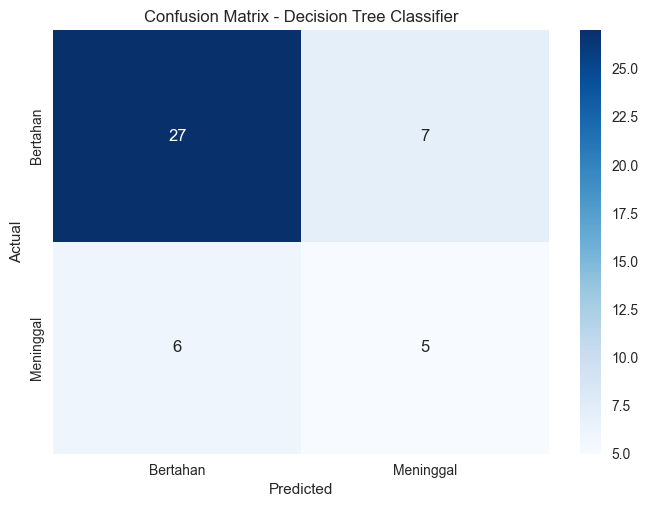

In [19]:
cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bertahan', 'Meninggal'],
            yticklabels=['Bertahan', 'Meninggal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

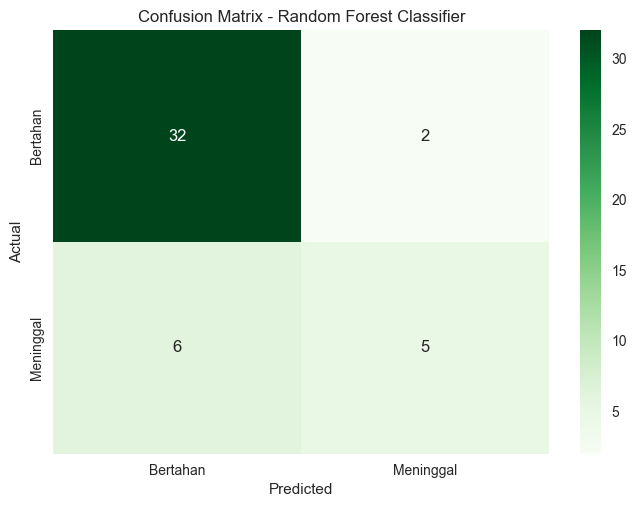

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bertahan', 'Meninggal'],
            yticklabels=['Bertahan', 'Meninggal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

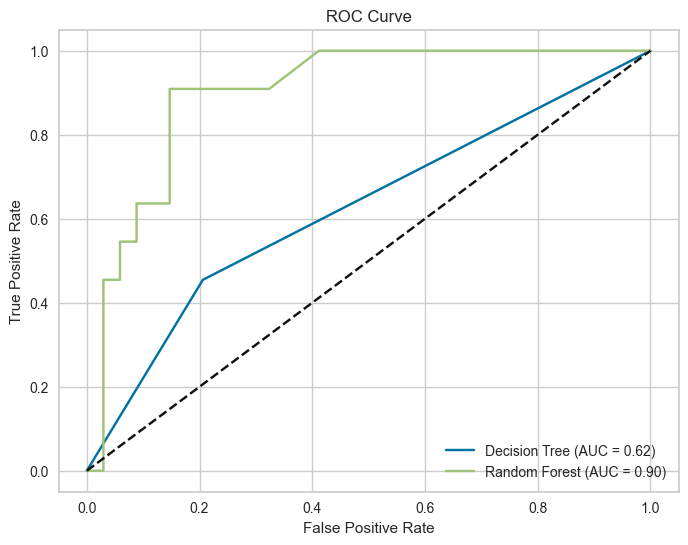

In [21]:
# ROC (Receiver Operating Characteristic) Curve
from sklearn.metrics import roc_curve, auc
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

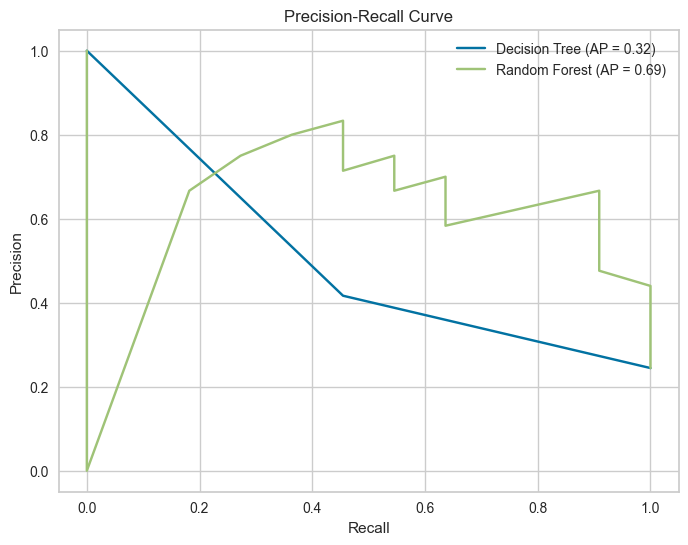

In [22]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
average_precision_dt = average_precision_score(y_test, y_prob_dt)
average_precision_rf = average_precision_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AP = {average_precision_dt:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Feature Importance:
time                        0.377117
ejection_fraction           0.146502
serum_creatinine            0.130485
age                         0.081027
platelets                   0.073892
creatinine_phosphokinase    0.066605
serum_sodium                0.059809
anaemia                     0.015501
smoking                     0.013781
diabetes                    0.012449
sex                         0.012189
high_blood_pressure         0.010643
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27824\3903062033.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis')


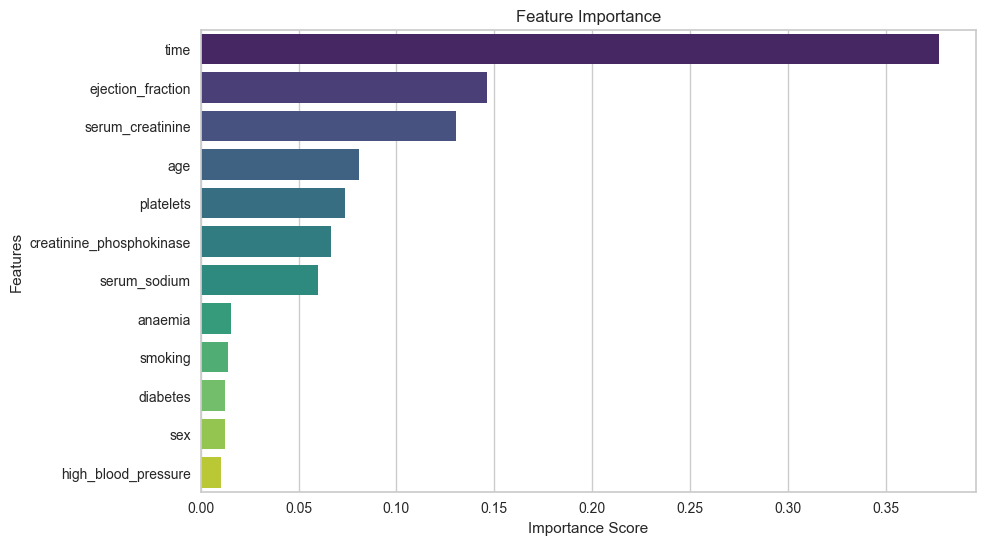

In [23]:
feature_names = X.columns
importances_rf = rf.feature_importances_ 
feature_imp = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_imp) 

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis') 
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Feature Importance (Decision Tree):
time                        0.522221
platelets                   0.142614
creatinine_phosphokinase    0.093815
serum_creatinine            0.075807
ejection_fraction           0.073499
smoking                     0.040780
age                         0.018887
diabetes                    0.018501
serum_sodium                0.013876
anaemia                     0.000000
high_blood_pressure         0.000000
sex                         0.000000
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27824\3959058084.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp_dt.values, y=feature_imp_dt.index, palette='magma')


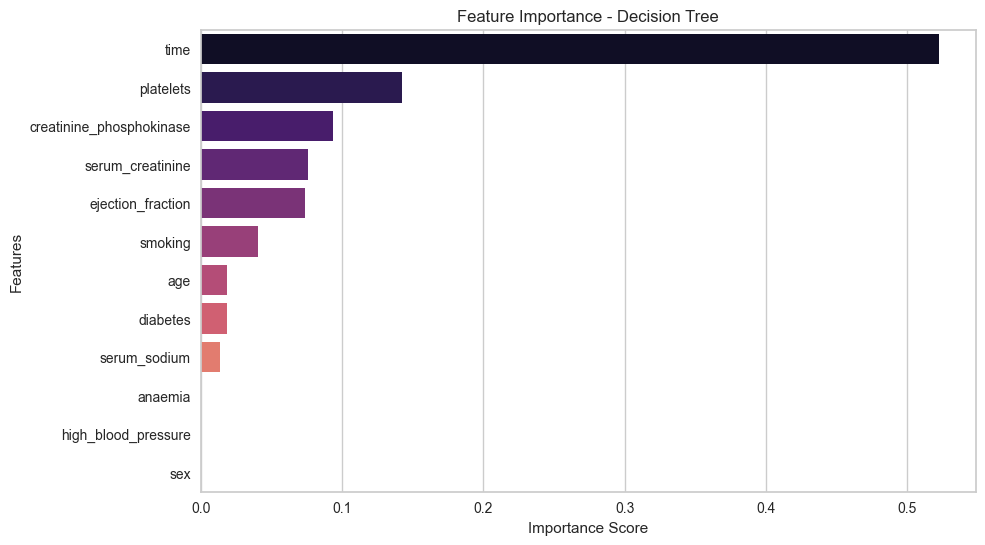

In [24]:
importances_dt = dt.feature_importances_
feature_imp_dt = pd.Series(importances_dt, index=feature_names).sort_values(ascending=False)

print("\nFeature Importance (Decision Tree):")
print(feature_imp_dt)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp_dt.values, y=feature_imp_dt.index, palette='magma')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

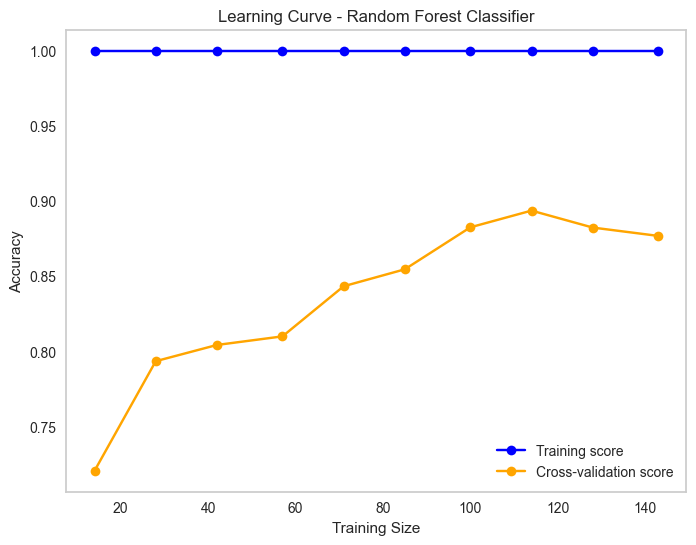

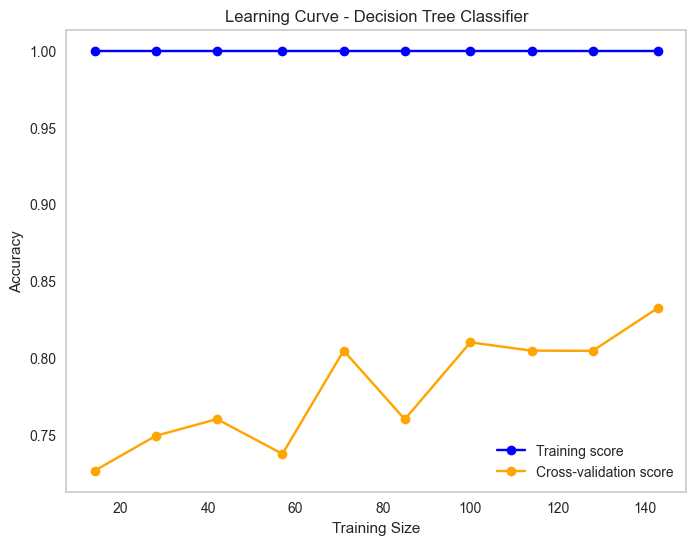

In [25]:
from sklearn.model_selection import learning_curve

# Learning Curve Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-validation score')
plt.title('Learning Curve - Random Forest Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Learning Curve Decision Tree
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-validation score')
plt.title('Learning Curve - Decision Tree Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Simulasi Input Data Baru

In [26]:
# --- LANGKAH 1: Simulasi Training Model (Agar Kode Berikutnya Bisa Jalan) ---
# Dummy training data
X_train_dummy = pd.DataFrame({
    'age': [55, 60, 45, 50],
    'anaemia': [0, 1, 0, 1],
    'creatinine_phosphokinase': [500, 200, 600, 100],
    'diabetes': [0, 1, 0, 1],
    'ejection_fraction': [35, 20, 45, 30],
    'high_blood_pressure': [1, 0, 1, 0],
    'platelets': [260000, 200000, 300000, 150000],
    'serum_creatinine': [1.1, 1.9, 0.9, 1.5],
    'serum_sodium': [130, 136, 140, 132],
    'sex': [1, 0, 1, 0],
    'smoking': [1, 0, 0, 1]
})
y_train_dummy = [0, 1, 0, 1] # 0: Hidup, 1: Meninggal

# Definisi model (Inilah 'best_model')
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
best_model.fit(X_train_dummy, y_train_dummy)

# --- LANGKAH 2: Kode Anda (Sekarang pasti jalan) ---

new_data = {
    'age': [50.0],
    'anaemia': [0],
    'creatinine_phosphokinase': [582],
    'diabetes': [0],
    'ejection_fraction': [40],
    'high_blood_pressure': [0],
    'platelets': [265000.0],
    'serum_creatinine': [1.0],
    'serum_sodium': [135],
    'sex': [1],
    'smoking': [0]
}

new_df = pd.DataFrame(new_data)

# Prediksi
new_pred = best_model.predict(new_df)
new_proba = best_model.predict_proba(new_df)[:, 1]

print("\nContoh Prediksi dengan Input Manual:")
print(f"Features: {new_data}")
print(f"Predicted: {new_pred[0]} (0: Bertahan, 1: Meninggal)")
print(f"Probability of Death: {new_proba[0]:.4f}")


Contoh Prediksi dengan Input Manual:
Features: {'age': [50.0], 'anaemia': [0], 'creatinine_phosphokinase': [582], 'diabetes': [0], 'ejection_fraction': [40], 'high_blood_pressure': [0], 'platelets': [265000.0], 'serum_creatinine': [1.0], 'serum_sodium': [135], 'sex': [1], 'smoking': [0]}
Predicted: 0 (0: Bertahan, 1: Meninggal)
Probability of Death: 0.2000
